# CNN ON MNIST

**1. 2 CONVOLUTIONAL LAYERS (MAX POOLING AND DROPOUT INCLUDED)**

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model1 = Sequential()
model1.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 16s 260us/step - loss: 0.2620 - acc: 0.9203 - val_loss: 0.0547 - val_acc: 0.9829
Epoch 2/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0875 - acc: 0.9735 - val_loss: 0.0379 - val_acc: 0.9863
Epoch 3/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0652 - acc: 0.9803 - val_loss: 0.0325 - val_acc: 0.9890
Epoch 4/12
60000/60000 [==============================] - 9s 144us/step - loss: 0.0550 - acc: 0.9834 - val_loss: 0.0351 - val_acc: 0.9884
Epoch 5/12
60000/60000 [===================

In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
__________

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
def plt_dynamic(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Loss")
  ax.plot(x, ty, 'r', label="Train Loss")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

In [0]:
def plt_dynamic1(x, vy, ty, ax, colors=['b']):
  ax.plot(x, vy, 'b', label="Validation Accuracy")
  ax.plot(x, ty, 'r', label="Training Accuracy")
  plt.legend()
  plt.grid()
  fig.canvas.draw()

Test score: 0.03149389391231671
Test accuracy: 0.9897


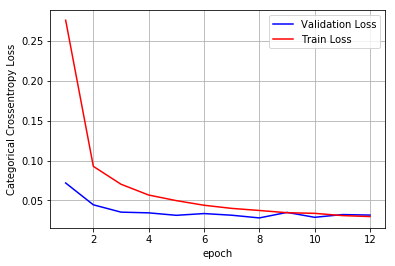

In [0]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

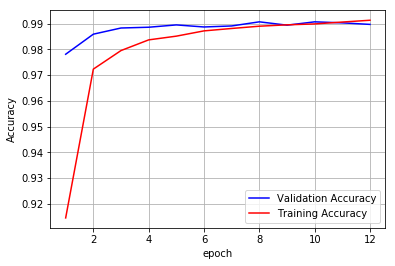

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**2. 2 CONVOLUTIONAL LAYERS (MAX POOLING AND BATCH NORMALIZATION)**

In [0]:
from keras.layers.normalization import BatchNormalization
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 5s 90us/step - loss: 0.2421 - acc: 0.9275 - val_loss: 0.0588 - val_acc: 0.9808
Epoch 2/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0849 - acc: 0.9748 - val_loss: 0.0432 - val_acc: 0.9862
Epoch 3/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0603 - acc: 0.9819 - val_loss: 0.0310 - val_acc: 0.9898
Epoch 4/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0499 - acc: 0.9846 - val_loss: 0.0492 - val_acc: 0.9858
Epoch 5/12
60000/60000 [==============================] - 4s 74us/step - loss: 0.0414 - acc: 0.9872 - val_loss: 0.0360 - val_acc: 0.9889
Epoch 6/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0381 - acc: 0.9882 - val_loss: 0.0285 - val_acc: 0.9913
Epoch 7/12
60000/60000 [==============================] - 4s 75us/step - loss: 0.0323 - acc: 0.9900 - val_loss: 0.0355 - val_acc

In [0]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_3 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
batch_normalization_4 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 800)               0         
__________

Test score: 0.023466705693548782
Test accuracy: 0.9936


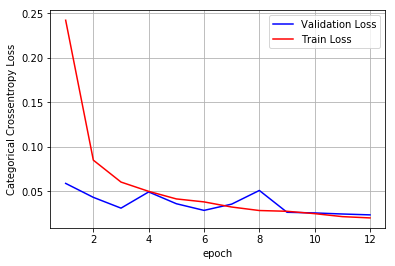

In [0]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

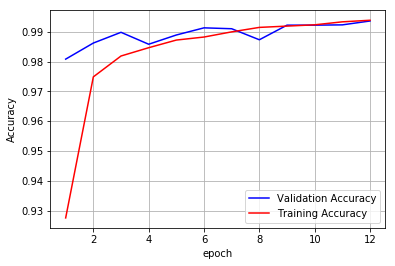

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**3. 2 CONVOLUTIONAL LAYERS (MAX POOLING AND BATCH NORMALIZATION AND DROPOUT)**

In [0]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential()

model3.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))

model3.add(Conv2D(32, (3, 3), activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.5))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.6806 - acc: 0.7886 - val_loss: 0.1084 - val_acc: 0.9656
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.2121 - acc: 0.9370 - val_loss: 0.0637 - val_acc: 0.9802
Epoch 3/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1523 - acc: 0.9553 - val_loss: 0.0481 - val_acc: 0.9837
Epoch 4/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.1286 - acc: 0.9618 - val_loss: 0.0389 - val_acc: 0.9865
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1175 - acc: 0.9653 - val_loss: 0.0375 - val_acc: 0.9886
Epoch 6/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1036 - acc: 0.9696 - val_loss: 0.0375 - val_acc: 0.9873
Epoch 7/12
60000/60000 [==============================] - 5s 82us/step - loss: 0.1018 - acc: 0.9708 - val_loss: 0.0377 - val_ac

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
batch_normalization_6 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 32)          0         
__________

Test score: 0.03226553132739282
Test accuracy: 0.9896


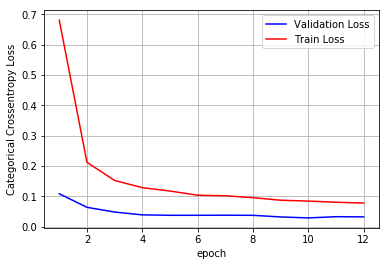

In [0]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

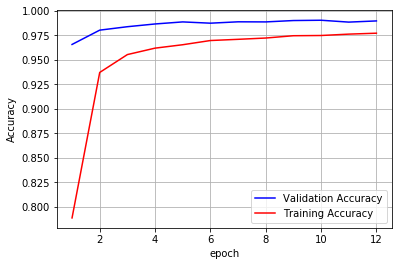

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**4. 3 CONVOLUTIONAL LAYERS (MAX POOLING AND BATCH NORMALIZATION 2X2 FILTER)**

In [0]:
from keras.layers.normalization import BatchNormalization
model4 = Sequential()

model4.add(Conv2D(64, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Conv2D(32, (2, 2), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(32, (2, 2), activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 108us/step - loss: 0.3744 - acc: 0.8829 - val_loss: 0.1285 - val_acc: 0.9619
Epoch 2/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.1192 - acc: 0.9644 - val_loss: 0.0635 - val_acc: 0.9817
Epoch 3/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0925 - acc: 0.9725 - val_loss: 0.0627 - val_acc: 0.9794
Epoch 4/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0728 - acc: 0.9781 - val_loss: 0.0570 - val_acc: 0.9840
Epoch 5/12
60000/60000 [==============================] - 5s 81us/step - loss: 0.0648 - acc: 0.9810 - val_loss: 0.0456 - val_acc: 0.9858
Epoch 6/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0559 - acc: 0.9830 - val_loss: 0.0432 - val_acc: 0.9867
Epoch 7/12
60000/60000 [==============================] - 5s 80us/step - loss: 0.0508 - acc: 0.9846 - val_loss: 0.0452 - val_ac

In [0]:
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 27, 27, 64)        256       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 32)        128       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 5, 5, 32)          4128      
__________

Test score: 0.045036793098763704
Test accuracy: 0.9874


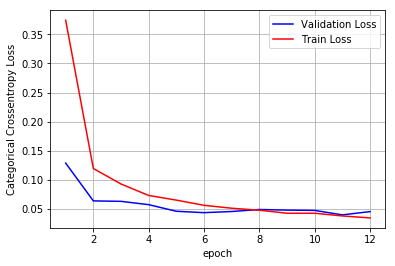

In [0]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

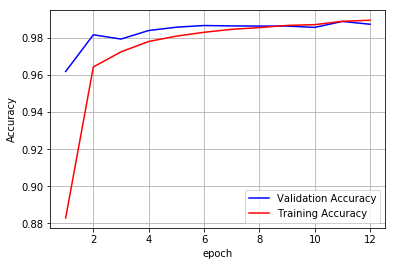

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**5. 3 CONVOLUTIONAL LAYERS (MAX POOLING,DROPOUT AND BATCH NORMALIZATION 5X5 FILTER)**

In [0]:
from keras.layers.normalization import BatchNormalization
model5 = Sequential()
#1ST 
model5.add(Conv2D(128, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=input_shape))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

#2ND
model5.add(Conv2D(64, (5, 5), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

#3RD

model5.add(Conv2D(32, (3, 3), activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.5))

model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.8208 - acc: 0.7304 - val_loss: 0.0687 - val_acc: 0.9793
Epoch 2/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.2279 - acc: 0.9324 - val_loss: 0.0879 - val_acc: 0.9726
Epoch 3/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.1650 - acc: 0.9520 - val_loss: 0.0400 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.1426 - acc: 0.9598 - val_loss: 0.0365 - val_acc: 0.9892
Epoch 5/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.1218 - acc: 0.9652 - val_loss: 0.0289 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 7s 119us/step - loss: 0.1123 - acc: 0.9684 - val_loss: 0.0273 - val_acc: 0.9915
Epoch 7/12
60000/60000 [==============================] - 7s 118us/step - loss: 0.1044 - acc: 0.9715 - val_loss: 0.0275 - 

In [0]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 24, 24, 128)       3328      
_________________________________________________________________
batch_normalization_16 (Batc (None, 24, 24, 128)       512       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_20 (Dropout)         (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 8, 8, 64)          204864    
_________________________________________________________________
batch_normalization_17 (Batc (None, 8, 8, 64)          256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 4, 4, 64)          0         
__________

Test score: 0.023486822005478462
Test accuracy: 0.9927


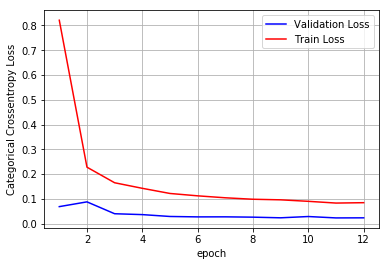

In [0]:
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

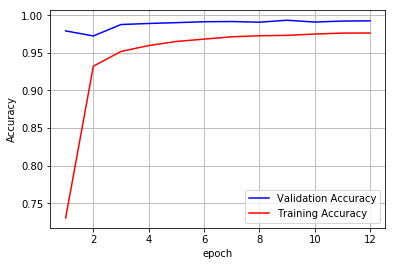

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**6. 3 CONVOLUTIONAL LAYERS (MAX POOLING AND BATCH NORMALIZATION 7X7 AND 5X5 FILTER)**

In [0]:
from keras.layers.normalization import BatchNormalization
model6 = Sequential()
#1ST 
model6.add(Conv2D(128, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))


#2ND
model6.add(Conv2D(64, (5, 5), activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))


#3RD

model6.add(Conv2D(32, (3, 3), activation='relu'))
model6.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))


model6.add(Flatten())
model6.add(Dense(128, activation='relu'))
model6.add(Dense(64, activation='relu'))
model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 9s 146us/step - loss: 0.1286 - acc: 0.9657 - val_loss: 0.0610 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0386 - acc: 0.9878 - val_loss: 0.0315 - val_acc: 0.9899
Epoch 3/12
60000/60000 [==============================] - 6s 107us/step - loss: 0.0262 - acc: 0.9913 - val_loss: 0.0456 - val_acc: 0.9879
Epoch 4/12
60000/60000 [==============================] - 6s 104us/step - loss: 0.0193 - acc: 0.9937 - val_loss: 0.0295 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0132 - acc: 0.9957 - val_loss: 0.0390 - val_acc: 0.9887
Epoch 6/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0101 - acc: 0.9970 - val_loss: 0.0271 - val_acc: 0.9916
Epoch 7/12
60000/60000 [==============================] - 6s 105us/step - loss: 0.0077 - acc: 0.9975 - val_loss: 0.0253 - 

In [0]:
model6.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 22, 22, 128)       6400      
_________________________________________________________________
batch_normalization_25 (Batc (None, 22, 22, 128)       512       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 7, 7, 64)          204864    
_________________________________________________________________
batch_normalization_26 (Batc (None, 7, 7, 64)          256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 1, 1, 32)          18464     
__________

Test score: 0.03316479856713909
Test accuracy: 0.9927


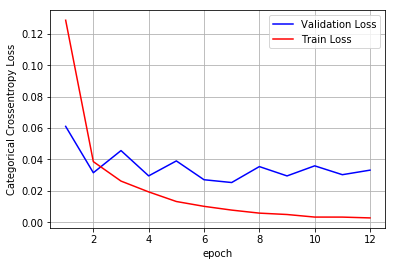

In [0]:
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

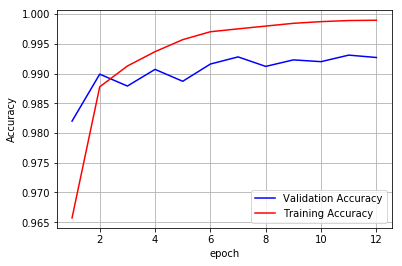

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**7. 5 CONVOLUTIONAL LAYERS (MAX POOLING AND BATCH NORMALIZATION 3X3 FILTER)**

In [0]:
from keras.layers.normalization import BatchNormalization
model7 = Sequential()
#1ST 
model7.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding="same"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))


#2ND
model7.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))


#3RD
model7.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

#4TH
model7.add(Conv2D(32, (3, 3), activation='relu',padding="same"))
model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))

#5TH
model7.add(Conv2D(16, (3, 3), activation='relu',padding="same"))
model7.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())
model7.add(Dense(32, activation='relu'))

model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 18s 294us/step - loss: 0.2058 - acc: 0.9512 - val_loss: 0.0864 - val_acc: 0.9748
Epoch 2/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0435 - acc: 0.9873 - val_loss: 0.0550 - val_acc: 0.9841
Epoch 3/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0289 - acc: 0.9915 - val_loss: 0.0323 - val_acc: 0.9903
Epoch 4/12
60000/60000 [==============================] - 15s 247us/step - loss: 0.0202 - acc: 0.9937 - val_loss: 0.0297 - val_acc: 0.9907
Epoch 5/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.0139 - acc: 0.9960 - val_loss: 0.1061 - val_acc: 0.9695
Epoch 6/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.0113 - acc: 0.9965 - val_loss: 0.0327 - val_acc: 0.9908
Epoch 7/12
60000/60000 [==============================] - 15s 246us/step - loss: 0.0079 - acc: 0.9977 - val_loss: 0.

In [0]:
model7.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
batch_normalization_22 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_23 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 7, 7, 64)          73792     
__________

Test score: 0.032069397589693835
Test accuracy: 0.9913


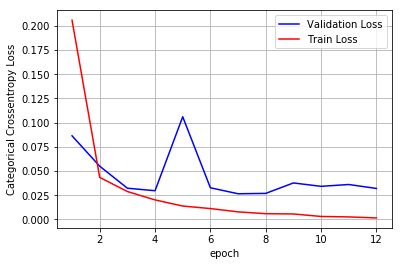

In [0]:
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

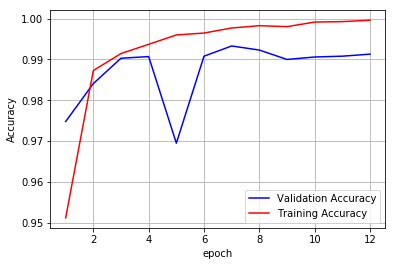

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**8. 5 CONVOLUTIONAL LAYERS (MAX POOLING,DROPOUT AND BATCH NORMALIZATION 3X3 FILTER)**

In [0]:
from keras.layers.normalization import BatchNormalization
model8 = Sequential()
#1ST 
model8.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding="same"))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))


#2ND
model8.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))


#3RD
model8.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))

#4TH
model8.add(Conv2D(32, (3, 3), activation='relu',padding="same"))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))

#5TH
model8.add(Conv2D(16, (3, 3), activation='relu',padding="same"))
model8.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))

model8.add(Flatten())
model8.add(Dense(32, activation='relu'))

model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 19s 321us/step - loss: 1.5369 - acc: 0.4407 - val_loss: 0.4345 - val_acc: 0.9056
Epoch 2/12
60000/60000 [==============================] - 17s 275us/step - loss: 0.6787 - acc: 0.7566 - val_loss: 0.1479 - val_acc: 0.9698
Epoch 3/12
60000/60000 [==============================] - 16s 275us/step - loss: 0.4721 - acc: 0.8374 - val_loss: 0.1065 - val_acc: 0.9716
Epoch 4/12
60000/60000 [==============================] - 16s 274us/step - loss: 0.3915 - acc: 0.8695 - val_loss: 0.0564 - val_acc: 0.9841
Epoch 5/12
60000/60000 [==============================] - 16s 275us/step - loss: 0.3410 - acc: 0.8866 - val_loss: 0.0594 - val_acc: 0.9841
Epoch 6/12
60000/60000 [==============================] - 16s 275us/step - loss: 0.3148 - acc: 0.8949 - val_loss: 0.0508 - val_acc: 0.9868
Epoch 7/12
60000/60000 [==============================] - 16s 274us/step - loss: 0.2894 - acc: 0.9012 - val_loss: 0.

In [0]:
model8.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
batch_normalization_27 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_28 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 7, 7, 128)         0         
__________

Test score: 0.0385118981421052
Test accuracy: 0.99


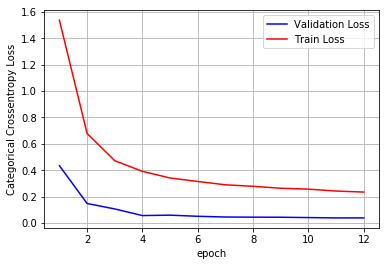

In [0]:
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

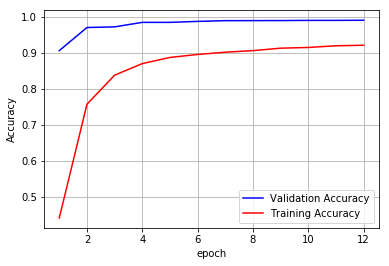

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**9. 7 CONVOLUTIONAL LAYERS (MAX POOLING,DROPOUT AND BATCH NORMALIZATION 3X3 FILTER)**

In [0]:
from keras.layers.normalization import BatchNormalization
model9 = Sequential()
#1ST 
model9.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding="same"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))


#2ND
model9.add(Conv2D(128, (3, 3), activation='relu',padding="same"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))


#3RD
model9.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))

#4TH
model9.add(Conv2D(64, (3, 3), activation='relu',padding="same"))
model9.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))

#5TH
model9.add(Conv2D(32, (3, 3), activation='relu',padding="same"))
model9.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))

#6TH
model9.add(Conv2D(32, (3, 3), activation='relu',padding="same"))
model9.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))

#7TH
model9.add(Conv2D(16, (3, 3), activation='relu',padding="same"))
model9.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.2))

model9.add(Flatten())
model9.add(Dense(32, activation='relu'))

model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model9.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 21s 347us/step - loss: 0.6060 - acc: 0.8114 - val_loss: 0.0880 - val_acc: 0.9770
Epoch 2/12
60000/60000 [==============================] - 17s 288us/step - loss: 0.1467 - acc: 0.9634 - val_loss: 0.0659 - val_acc: 0.9816
Epoch 3/12
60000/60000 [==============================] - 18s 295us/step - loss: 0.1015 - acc: 0.9753 - val_loss: 0.0462 - val_acc: 0.9891
Epoch 4/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.0836 - acc: 0.9798 - val_loss: 0.0354 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 18s 297us/step - loss: 0.0704 - acc: 0.9830 - val_loss: 0.0304 - val_acc: 0.9923
Epoch 6/12
60000/60000 [==============================] - 18s 296us/step - loss: 0.0639 - acc: 0.9851 - val_loss: 0.0315 - val_acc: 0.9921
Epoch 7/12
60000/60000 [==============================] - 17s 290us/step - loss: 0.0568 - acc: 0.9866 - val_loss: 0.

In [0]:
model9.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
batch_normalization_32 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_33 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 128)         0         
__________

Test score: 0.025403328641527334
Test accuracy: 0.9938


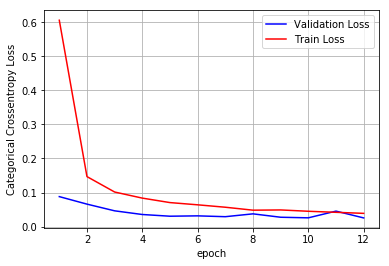

In [0]:
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

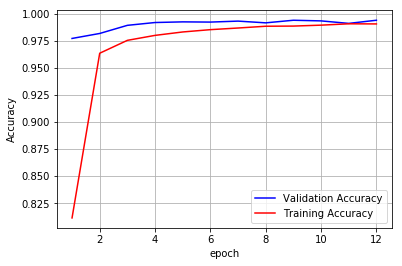

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

In [0]:
x= [model1.evaluate(x_test, y_test, verbose=0)[0],model2.evaluate(x_test, y_test, verbose=0)[0],model3.evaluate(x_test, y_test, verbose=0)[0],model4.evaluate(x_test, y_test, verbose=0)[0],model5.evaluate(x_test, y_test, verbose=0)[0],model6.evaluate(x_test, y_test, verbose=0)[0],model7.evaluate(x_test, y_test, verbose=0)[0],model8.evaluate(x_test, y_test, verbose=0)[0],model9.evaluate(x_test, y_test, verbose=0)[0]]

In [0]:
y= [model1.evaluate(x_test, y_test, verbose=0)[1],model2.evaluate(x_test, y_test, verbose=0)[1],model3.evaluate(x_test, y_test, verbose=0)[1],model4.evaluate(x_test, y_test, verbose=0)[1],model5.evaluate(x_test, y_test, verbose=0)[1],model6.evaluate(x_test, y_test, verbose=0)[1],model7.evaluate(x_test, y_test, verbose=0)[1],model8.evaluate(x_test, y_test, verbose=0)[1],model9.evaluate(x_test, y_test, verbose=0)[1]]

In [0]:
models = list(range(1,10))

W0825 12:42:55.277995 140359865685888 legend.py:1289] No handles with labels found to put in legend.


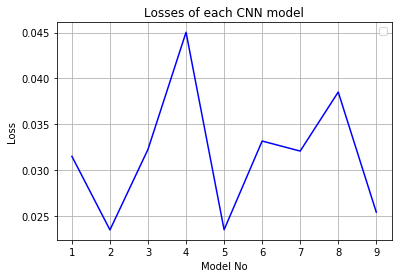

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Model No') ; ax.set_ylabel('Loss')
ax.plot(models, x, 'b')
plt.legend()
plt.grid()
plt.title('Losses of each CNN model')
#plt.show()
fig.canvas.draw()

W0825 12:45:15.068250 140359865685888 legend.py:1289] No handles with labels found to put in legend.


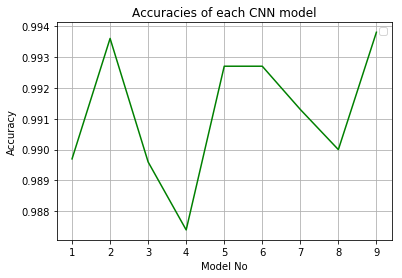

In [0]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('Model No') ; ax.set_ylabel('Accuracy')
ax.plot(models, y, 'g')
plt.legend()
plt.grid()
plt.title('Accuracies of each CNN model')
#plt.show()
fig.canvas.draw()

**10. 3 CONVOLUTIONAL LAYERS (MAX POOLING , 2X2 FILTER-RANDOM UNIFORM INITIALISER)**

In [5]:
#from keras.layers.normalization import BatchNormalization
model1 = Sequential()

model1.add(Conv2D(64, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape,kernel_initializer='random_uniform'))
model1.add(MaxPooling2D(pool_size=(2, 2)))


model1.add(Conv2D(32, (2, 2), activation='relu',kernel_initializer='random_uniform'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Conv2D(32, (2, 2), activation='relu',kernel_initializer='random_uniform'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

model1.add(Flatten())
model1.add(Dense(128, activation='relu',kernel_initializer='random_uniform'))
model1.add(Dropout(0.5))
model1.add(Dense(num_classes, activation='softmax'))

model1.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model1.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 107us/step - loss: 0.8491 - acc: 0.7100 - val_loss: 0.1752 - val_acc: 0.9444
Epoch 2/12
60000/60000 [==============================] - 6s 97us/step - loss: 0.2067 - acc: 0.9372 - val_loss: 0.1065 - val_acc: 0.9668
Epoch 3/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.1483 - acc: 0.9561 - val_loss: 0.0824 - val_acc: 0.9747
Epoch 4/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.1204 - acc: 0.9638 - val_loss: 0.0804 - val_acc: 0.9750
Epoch 5/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.1066 - acc: 0.9680 - val_loss: 0.0674 - val_acc: 0.9784
Epoch 6/12
60000/60000 [==============================] - 6s 95us/step - loss: 0.0935 - acc: 0.9722 - val_loss: 0.0688 - val_acc: 0.9791
Epoch 7/12
60000/60000 [==============================] - 6s 96us/step - loss: 0.0849 - acc: 0.9746 - val_loss: 0.0556 - val_ac

In [6]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 5, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)              

Test score: 0.04492342894774338
Test accuracy: 0.9862


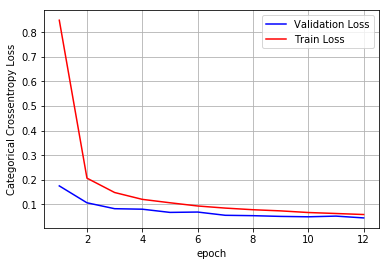

In [7]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

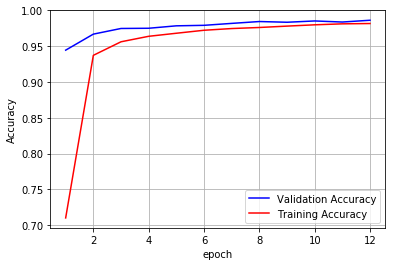

In [8]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**11. 3 CONVOLUTIONAL LAYERS (MAX POOLING , 2X2 FILTER-RANDOM UNIFORM INITIALISER ,TANH ACTIVATION)**

In [9]:
#from keras.layers.normalization import BatchNormalization
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(2, 2),
                 activation='tanh',
                 input_shape=input_shape,kernel_initializer='random_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2)))


model2.add(Conv2D(32, (2, 2), activation='tanh',kernel_initializer='random_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(32, (2, 2), activation='tanh',kernel_initializer='random_uniform'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation='tanh',kernel_initializer='random_uniform'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 114us/step - loss: 0.5136 - acc: 0.8313 - val_loss: 0.1369 - val_acc: 0.9578
Epoch 2/12
60000/60000 [==============================] - 6s 103us/step - loss: 0.1358 - acc: 0.9581 - val_loss: 0.0916 - val_acc: 0.9703
Epoch 3/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.1038 - acc: 0.9681 - val_loss: 0.0743 - val_acc: 0.9770
Epoch 4/12
60000/60000 [==============================] - 6s 101us/step - loss: 0.0898 - acc: 0.9726 - val_loss: 0.0703 - val_acc: 0.9775
Epoch 5/12
60000/60000 [==============================] - 6s 102us/step - loss: 0.0776 - acc: 0.9767 - val_loss: 0.0660 - val_acc: 0.9795
Epoch 6/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.0711 - acc: 0.9778 - val_loss: 0.0576 - val_acc: 0.9817
Epoch 7/12
60000/60000 [==============================] - 6s 98us/step - loss: 0.0649 - acc: 0.9801 - val_loss: 0.0612 - v

In [10]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 12, 12, 32)        8224      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 5, 5, 32)          4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

Test score: 0.0631999080858659
Test accuracy: 0.9825


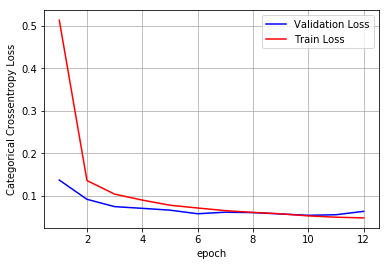

In [11]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

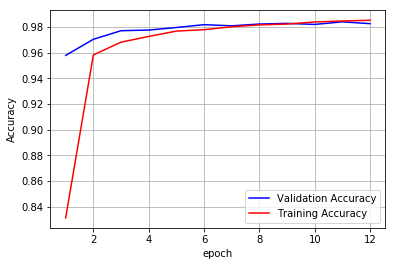

In [12]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**12. 3 CONVOLUTIONAL LAYERS (MAX POOLING ,BATCH NORM,DROPOUT=(0.4) 2X2 FILTER-ORTHOGONAL INITIALISER ,TANH ACTIVATION)**

In [18]:
from keras.layers.normalization import BatchNormalization
model3 = Sequential()

model3.add(Conv2D(64, kernel_size=(2, 2),
                 activation='tanh',
                 input_shape=input_shape,kernel_initializer='orthogonal'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))


model3.add(Conv2D(32, (2, 2), activation='tanh',kernel_initializer='orthogonal'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))

model3.add(Conv2D(32, (2, 2), activation='tanh',kernel_initializer='orthogonal'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(128, activation='tanh'))
model3.add(Dropout(0.4))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model3.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 10s 170us/step - loss: 1.2124 - acc: 0.5906 - val_loss: 0.4706 - val_acc: 0.8536
Epoch 2/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.5745 - acc: 0.8124 - val_loss: 0.5390 - val_acc: 0.8286
Epoch 3/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.4348 - acc: 0.8603 - val_loss: 0.2854 - val_acc: 0.9100
Epoch 4/12
60000/60000 [==============================] - 9s 150us/step - loss: 0.3666 - acc: 0.8842 - val_loss: 0.1562 - val_acc: 0.9510
Epoch 5/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.3253 - acc: 0.8980 - val_loss: 0.1373 - val_acc: 0.9574
Epoch 6/12
60000/60000 [==============================] - 9s 152us/step - loss: 0.2971 - acc: 0.9069 - val_loss: 0.1358 - val_acc: 0.9565
Epoch 7/12
60000/60000 [==============================] - 9s 151us/step - loss: 0.2755 - acc: 0.9142 - val_loss: 0.1017 -

In [15]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 12, 12, 32)        8224      
_________________________________________________________________
batch_normalization_2 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 32)         

Test score: 0.0859176158150658
Test accuracy: 0.9718


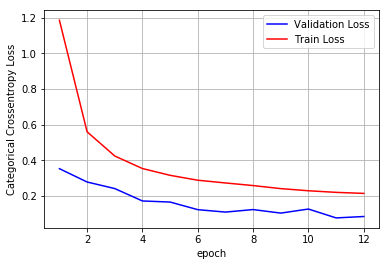

In [16]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

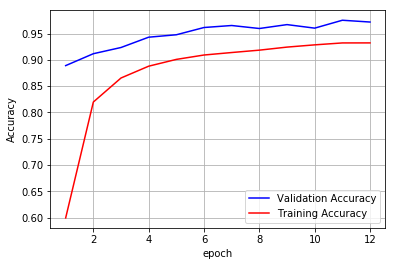

In [17]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**13. 3 CONVOLUTIONAL LAYERS (MAX POOLING, 3X3 FILTER-ORTHOGONAL INITIALISER ,SIGMOID ACTIVATION)**

In [20]:
from keras.layers.normalization import BatchNormalization
model4 = Sequential()

model4.add(Conv2D(64, kernel_size=(3,3),
                 activation='sigmoid',
                 input_shape=input_shape,kernel_initializer='orthogonal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))



model4.add(Conv2D(32, (3, 3), activation='sigmoid',kernel_initializer='orthogonal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))


model4.add(Conv2D(32, (3, 3), activation='sigmoid',kernel_initializer='orthogonal'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())
model4.add(Dense(128, activation='sigmoid'))
model4.add(Dropout(0.4))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

inspect = model4.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 8s 126us/step - loss: 2.3453 - acc: 0.1022 - val_loss: 2.3022 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 6s 103us/step - loss: 2.3064 - acc: 0.1058 - val_loss: 2.3022 - val_acc: 0.1009
Epoch 3/12
60000/60000 [==============================] - 6s 101us/step - loss: 2.3038 - acc: 0.1077 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 6s 99us/step - loss: 2.3024 - acc: 0.1097 - val_loss: 2.3012 - val_acc: 0.1135
Epoch 5/12
60000/60000 [==============================] - 6s 99us/step - loss: 2.3021 - acc: 0.1108 - val_loss: 2.3013 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 6s 102us/step - loss: 2.3021 - acc: 0.1113 - val_loss: 2.3011 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 6s 104us/step - loss: 2.3016 - acc: 0.1118 - val_loss: 2.3015 - va

In [21]:
model4.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32)               

Test score: 2.3009641578674316
Test accuracy: 0.1135


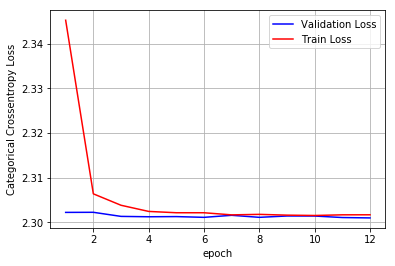

In [22]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

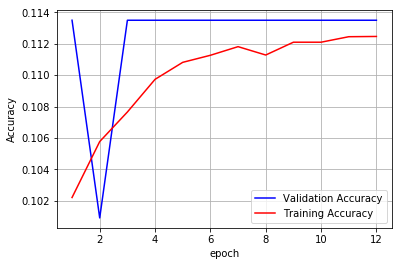

In [23]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**14. 5 CONVOLUTIONAL LAYERS (MAX POOLING AND BATCH NORMALIZATION 3X3 FILTER,ELU ACTIVATION,RMSProp OPTIMISER)**

In [27]:
from keras.layers.normalization import BatchNormalization
model5 = Sequential()
#1ST 
model5.add(Conv2D(256, kernel_size=(3, 3),
                 activation='elu',
                 input_shape=input_shape,padding="same",kernel_initializer='zeros'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.6))


#2ND
model5.add(Conv2D(128, (3, 3), activation='elu',padding="same",kernel_initializer='zeros'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))


#3RD
model5.add(Conv2D(64, (3, 3), activation='elu',padding="same",kernel_initializer='zeros'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

#4TH
model5.add(Conv2D(32, (3, 3), activation='elu',padding="same",kernel_initializer='zeros'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

#5TH
model5.add(Conv2D(16, (3, 3), activation='elu',padding="same",kernel_initializer='zeros'))
model5.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

model5.add(Flatten())
model5.add(Dense(32, activation='elu'))

model5.add(Dense(num_classes, activation='softmax'))

model5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

inspect = model5.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 505us/step - loss: 2.3017 - acc: 0.1120 - val_loss: 2.3062 - val_acc: 0.1135
Epoch 2/12
60000/60000 [==============================] - 28s 468us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3040 - val_acc: 0.1135
Epoch 3/12
60000/60000 [==============================] - 28s 471us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3042 - val_acc: 0.1135
Epoch 4/12
60000/60000 [==============================] - 28s 470us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3038 - val_acc: 0.1032
Epoch 5/12
60000/60000 [==============================] - 28s 473us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.3033 - val_acc: 0.1135
Epoch 6/12
60000/60000 [==============================] - 28s 470us/step - loss: 2.3014 - acc: 0.1123 - val_loss: 2.3017 - val_acc: 0.1135
Epoch 7/12
60000/60000 [==============================] - 28s 468us/step - loss: 2.3014 - acc: 0.1120 - val_loss: 2.

In [28]:
model5.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_33 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
batch_normalization_15 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_16 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 7, 7, 64)        

Test score: 2.3016848217010497
Test accuracy: 0.1135


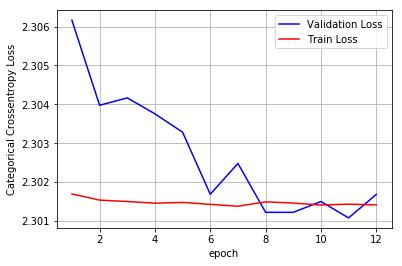

In [29]:
score = model5.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

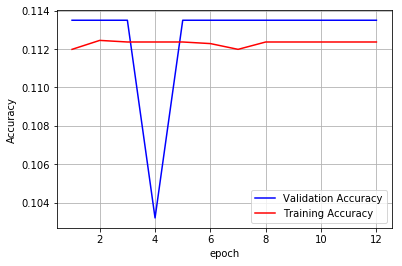

In [30]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**15. 5 CONVOLUTIONAL LAYERS (MAX POOLING,DROPOUT AND BATCH NORMALIZATION 3X3 FILTER,RMSProp OPTIMISER, TANH Activation)**

In [32]:
from keras.layers.normalization import BatchNormalization
model6 = Sequential()
#1ST 
model6.add(Conv2D(256, kernel_size=(3, 3),
                 activation='tanh',
                 input_shape=input_shape,padding="same",kernel_initializer='ones'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.6))


#2ND
model6.add(Conv2D(128, (3, 3), activation='tanh',padding="same",kernel_initializer='ones'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))


#3RD
model6.add(Conv2D(64, (3, 3), activation='tanh',padding="same",kernel_initializer='ones'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

#4TH
model6.add(Conv2D(32, (3, 3), activation='tanh',padding="same",kernel_initializer='ones'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

#5TH
model6.add(Conv2D(16, (3, 3), activation='tanh',padding="same",kernel_initializer='ones'))
model6.add(BatchNormalization())
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

model6.add(Flatten())
model6.add(Dense(32, activation='tanh'))

model6.add(Dense(num_classes, activation='softmax'))

model6.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

inspect = model6.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 30s 505us/step - loss: 2.1452 - acc: 0.1819 - val_loss: 2.1244 - val_acc: 0.1849
Epoch 2/12
60000/60000 [==============================] - 28s 464us/step - loss: 2.1422 - acc: 0.1834 - val_loss: 2.1243 - val_acc: 0.1903
Epoch 3/12
60000/60000 [==============================] - 28s 462us/step - loss: 2.1416 - acc: 0.1829 - val_loss: 2.1280 - val_acc: 0.1857
Epoch 4/12
60000/60000 [==============================] - 28s 462us/step - loss: 2.1412 - acc: 0.1818 - val_loss: 2.1236 - val_acc: 0.1850
Epoch 5/12
60000/60000 [==============================] - 28s 464us/step - loss: 2.1404 - acc: 0.1844 - val_loss: 2.1242 - val_acc: 0.1903
Epoch 6/12
60000/60000 [==============================] - 28s 464us/step - loss: 2.1405 - acc: 0.1813 - val_loss: 2.1249 - val_acc: 0.1856
Epoch 7/12
60000/60000 [==============================] - 28s 466us/step - loss: 2.1403 - acc: 0.1819 - val_loss: 2.

In [33]:
model6.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
batch_normalization_23 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_24 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 7, 7, 64)        

Test score: 2.1241648181915282
Test accuracy: 0.1857


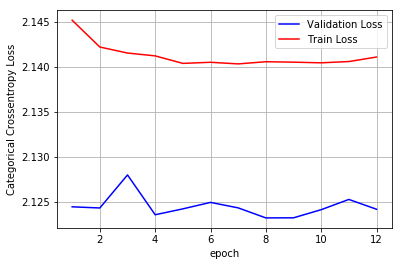

In [34]:
score = model6.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

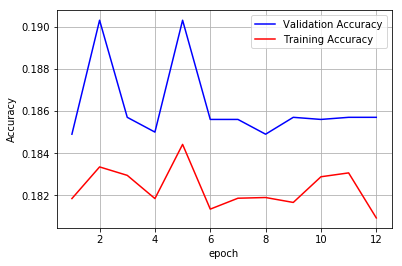

In [35]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**16. 5 CONVOLUTIONAL LAYERS (MAX POOLING, 3X3 FILTER,RMSProp OPTIMISER,TANH Activation,RANDOM UNIFORM INITIALISER)**

In [37]:
from keras.layers.normalization import BatchNormalization
model7 = Sequential()
#1ST 
model7.add(Conv2D(256, kernel_size=(3, 3),
                 activation='tanh',
                 input_shape=input_shape,padding="same",kernel_initializer='random_uniform'))
#model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.6))


#2ND
model7.add(Conv2D(128, (3, 3), activation='tanh',padding="same",kernel_initializer='random_uniform'))

#model6.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))


#3RD
model7.add(Conv2D(64, (3, 3), activation='tanh',padding="same",kernel_initializer='random_uniform'))
#model7.add(BatchNormalization())
model7.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

#4TH
model7.add(Conv2D(32, (3, 3), activation='tanh',padding="same",kernel_initializer='random_uniform'))
#model7.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

#5TH
model7.add(Conv2D(16, (3, 3), activation='tanh',padding="same",kernel_initializer='random_uniform'))
#model6.add(BatchNormalization())
#model7.add(MaxPooling2D(pool_size=(2, 2)))
#model5.add(Dropout(0.5))

model7.add(Flatten())
model7.add(Dense(32, activation='tanh'))

model7.add(Dense(num_classes, activation='softmax'))

model7.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

inspect = model7.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 29s 483us/step - loss: 2.1406 - acc: 0.1824 - val_loss: 2.1229 - val_acc: 0.1850
Epoch 2/12
60000/60000 [==============================] - 28s 463us/step - loss: 2.1403 - acc: 0.1812 - val_loss: 2.1250 - val_acc: 0.1903
Epoch 3/12
60000/60000 [==============================] - 28s 462us/step - loss: 2.1406 - acc: 0.1826 - val_loss: 2.1245 - val_acc: 0.1856
Epoch 4/12
60000/60000 [==============================] - 28s 467us/step - loss: 2.1403 - acc: 0.1819 - val_loss: 2.1243 - val_acc: 0.1856
Epoch 5/12
60000/60000 [==============================] - 28s 464us/step - loss: 2.1398 - acc: 0.1832 - val_loss: 2.1243 - val_acc: 0.1849
Epoch 6/12
60000/60000 [==============================] - 28s 462us/step - loss: 2.1408 - acc: 0.1834 - val_loss: 2.1240 - val_acc: 0.1856
Epoch 7/12
60000/60000 [==============================] - 28s 464us/step - loss: 2.1401 - acc: 0.1829 - val_loss: 2.

In [38]:
model7.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 7, 7, 64)          73792     
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 3, 3, 32)        

Test score: 2.3014822479248047
Test accuracy: 0.0977


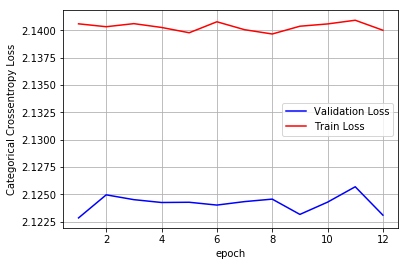

In [39]:
score = model7.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

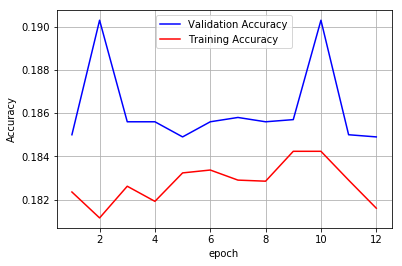

In [40]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**17. 5 CONVOLUTIONAL LAYERS (MAX POOLING,BATCHNORM AND DROPOUT(0.5 and 0.6) 3X3 FILTER,SGD OPTIMISER,RELU Activation,RANDOM UNIFORM INITIALISER)**

In [43]:
from keras.layers.normalization import BatchNormalization
model8 = Sequential()
#1ST 
model8.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding="same",kernel_initializer='random_uniform'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.6))


#2ND
model8.add(Conv2D(128, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))

model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))


#3RD
model8.add(Conv2D(64, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))

#4TH
model8.add(Conv2D(32, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))
model8.add(BatchNormalization())
model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))

#5TH
model8.add(Conv2D(16, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))
model8.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2)))
model8.add(Dropout(0.5))

model8.add(Flatten())
model8.add(Dense(32, activation='relu'))

model8.add(Dense(num_classes, activation='softmax'))

model8.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

inspect = model8.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 33s 544us/step - loss: 2.2076 - acc: 0.1946 - val_loss: 2.9449 - val_acc: 0.1193
Epoch 2/12
60000/60000 [==============================] - 30s 497us/step - loss: 1.7290 - acc: 0.3785 - val_loss: 1.9839 - val_acc: 0.3266
Epoch 3/12
60000/60000 [==============================] - 30s 497us/step - loss: 1.4061 - acc: 0.4878 - val_loss: 1.3686 - val_acc: 0.5544
Epoch 4/12
60000/60000 [==============================] - 30s 505us/step - loss: 1.1591 - acc: 0.5782 - val_loss: 0.8924 - val_acc: 0.7431
Epoch 5/12
60000/60000 [==============================] - 30s 503us/step - loss: 0.9946 - acc: 0.6436 - val_loss: 0.6976 - val_acc: 0.7971
Epoch 6/12
60000/60000 [==============================] - 30s 505us/step - loss: 0.8827 - acc: 0.6832 - val_loss: 0.5779 - val_acc: 0.8454
Epoch 7/12
60000/60000 [==============================] - 30s 503us/step - loss: 0.7983 - acc: 0.7183 - val_loss: 0.

In [45]:
model8.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_67 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
batch_normalization_38 (Batc (None, 28, 28, 256)       1024      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_32 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
batch_normalization_39 (Batc (None, 14, 14, 128)       512       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 7, 7, 128)       

Test score: 0.1933117022037506
Test accuracy: 0.9499


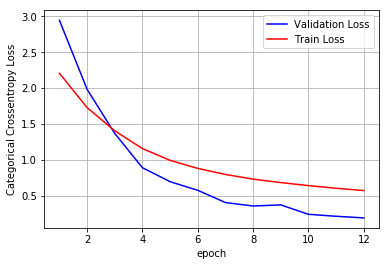

In [46]:
score = model8.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

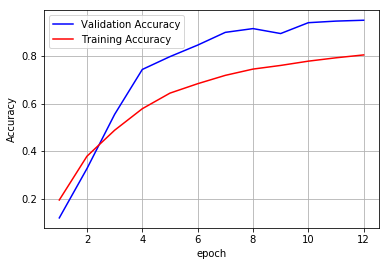

In [47]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

**18. 5 CONVOLUTIONAL LAYERS (MAX POOLING,DROPOUT, 3X3 FILTER,Adamax OPTIMISER,TANH Activation,Orthogonal INITIALISER)**

In [48]:
from keras.layers.normalization import BatchNormalization
model9 = Sequential()
#1ST 
model9.add(Conv2D(256, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape,padding="same",kernel_initializer='random_uniform'))
#model8.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.3))


#2ND
model9.add(Conv2D(128, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))

#model8.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.3))


#3RD
model9.add(Conv2D(64, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))
#model8.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.3))

#4TH
model9.add(Conv2D(32, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))
#model8.add(BatchNormalization())
model9.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.3))

#5TH
model9.add(Conv2D(16, (3, 3), activation='relu',padding="same",kernel_initializer='random_uniform'))
model9.add(BatchNormalization())
#model8.add(MaxPooling2D(pool_size=(2, 2)))
model9.add(Dropout(0.3))

model9.add(Flatten())
model9.add(Dense(32, activation='relu'))

model9.add(Dense(num_classes, activation='softmax'))

model9.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])

inspect = model9.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 25s 414us/step - loss: 1.0174 - acc: 0.6607 - val_loss: 0.1634 - val_acc: 0.9638
Epoch 2/12
60000/60000 [==============================] - 22s 375us/step - loss: 0.2846 - acc: 0.9224 - val_loss: 0.0631 - val_acc: 0.9820
Epoch 3/12
60000/60000 [==============================] - 23s 375us/step - loss: 0.1986 - acc: 0.9456 - val_loss: 0.0465 - val_acc: 0.9864
Epoch 4/12
60000/60000 [==============================] - 23s 378us/step - loss: 0.1543 - acc: 0.9582 - val_loss: 0.0371 - val_acc: 0.9893
Epoch 5/12
60000/60000 [==============================] - 22s 373us/step - loss: 0.1346 - acc: 0.9641 - val_loss: 0.0367 - val_acc: 0.9903
Epoch 6/12
60000/60000 [==============================] - 22s 375us/step - loss: 0.1244 - acc: 0.9675 - val_loss: 0.0391 - val_acc: 0.9895
Epoch 7/12
60000/60000 [==============================] - 22s 372us/step - loss: 0.1139 - acc: 0.9698 - val_loss: 0.

In [49]:
model9.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_72 (Conv2D)           (None, 28, 28, 256)       2560      
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 14, 14, 256)       0         
_________________________________________________________________
dropout_37 (Dropout)         (None, 14, 14, 256)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 14, 14, 128)       295040    
_________________________________________________________________
max_pooling2d_60 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_38 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 7, 7, 64)        

Test score: 0.023112671578422304
Test accuracy: 0.9931


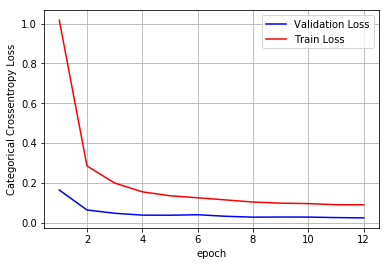

In [50]:
score = model9.evaluate(x_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vl = inspect.history['val_loss']
tl = inspect.history['loss']
plt_dynamic(x, vl, tl, ax)

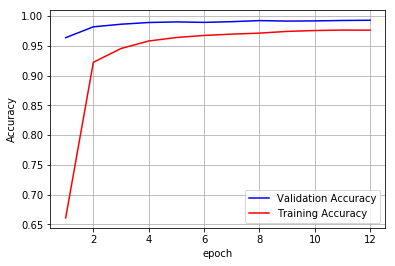

In [51]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Accuracy')
x = list(range(1,epochs+1))
vacc = inspect.history['val_acc']
tacc = inspect.history['acc']
plt_dynamic1(x, vacc, tacc, ax)

# Conclusions

In [0]:
from prettytable import PrettyTable
f='Not present'
t='Present'
t25='Present-(Rate=0.25)'
t5='Present-(Rate=0.5)'
t2='Present-(Rate=0.2)'
test_scr=[0.031,0.023,0.032,0.045,0.023,0.033,0.032,0.038,0.025]
test_acc=[0.9897,0.9936,0.9896,0.9874,0.9927,0.9927,0.9913,0.99,0.9938]
d=[t25,f,t5,f,t5,f,f,t5,t2]
b=[f,t,t,t,t,t,t,t,t]
l=[2,2,2,3,3,3,5,5,7]
sno =[1,2,3,4,5,6,7,8,9]

In [0]:
table = PrettyTable()
table.add_column('S-NO',sno)
table.add_column("No of Convolution Layers",l)
table.add_column("Dropout Present",d)
table.add_column("Batch Norm Present",b)
table.add_column("Test Loss",test_scr)
table.add_column("Test Acuracy",test_acc)


In [0]:
print('In the pretty table Dropout is considered only of the convolutional layers.Some models are having a dense layer with dropout value 0.5 and some doesnt have any dropout rate to their dense layer')
print(table)

In the pretty table Dropout is considered only of the convolutional layers.Some models are having a dense layer with dropout value 0.5 and some doesnt have any dropout rate to their dense layer
+------+--------------------------+---------------------+--------------------+-----------+--------------+
| S-NO | No of Convolution Layers |   Dropout Present   | Batch Norm Present | Test Loss | Test Acuracy |
+------+--------------------------+---------------------+--------------------+-----------+--------------+
|  1   |            2             | Present-(Rate=0.25) |    Not present     |   0.031   |    0.9897    |
|  2   |            2             |     Not present     |      Present       |   0.023   |    0.9936    |
|  3   |            2             |  Present-(Rate=0.5) |      Present       |   0.032   |    0.9896    |
|  4   |            3             |     Not present     |      Present       |   0.045   |    0.9874    |
|  5   |            3             |  Present-(Rate=0.5) |      P

In [0]:
F='Not present'
T='Present'
T5 = 'Present-(Rate = 0.5)'
T3 = 'Present-(Rate = 0.3)'
T4 = 'Present-(Rate = 0.4)'
Optimiser = ['AdaDelta','AdaDelta','AdaDelta','AdaDelta','RMSProp','RMSProp','RMSProp','SGD','Adamax']
Activation =['Relu','Tanh','Tanh','Sigmoid','Elu','Tanh','Tanh','Relu','Relu']
Initialiser = ['Random_Uniform','Random_Uniform','Orthogonal','Orthogonal','Zeros','Ones','Random_Uniform','Random_Uniform','Random_Uniform']
Filter_size= [2,2,2,3,3,3,3,3,3]
layers =[3,3,3,3,5,5,5,5,5]
d=[F,F,T4,F,F,F,F,T5,T3]
b=[F,F,T,F,T,T,F,T,F]
test_scr=[0.044,0.063,0.075,2.300,2.301,2.124,2.301,0.193,0.023]
test_acc=[0.986,0.982,0.977,0.113,0.113,0.185,0.097,0.949,0.993]
sno =[1,2,3,4,5,6,7,8,9]
from prettytable import PrettyTable
table = PrettyTable()
table.add_column('S-NO',sno)
table.add_column("No of Convolution Layers",layers)
table.add_column("Optimizer",Optimiser)
table.add_column("Activation fn",Activation)
table.add_column("Initializer",Initialiser)
table.add_column("Size of the filter",Filter_size)
table.add_column("Dropout Present",d)
table.add_column("Batch Norm Present",b)
table.add_column("Test Loss",test_scr)
table.add_column("Test Acuracy",test_acc)

In [54]:
print('Comparison table of models with different activation functions,intialisers,Optimisers other than those used in previous models')
print('In the pretty table Dropout is considered only of the convolutional layers.Some models are having a dense layer with dropout value 0.5 and some doesnt have any dropout rate to their dense layer')
print(table)

Comparison table of models with different activation functions,intialisers,Optimisers other than those used in previous models
In the pretty table Dropout is considered only of the convolutional layers.Some models are having a dense layer with dropout value 0.5 and some doesnt have any dropout rate to their dense layer
+------+--------------------------+-----------+---------------+----------------+--------------------+----------------------+--------------------+-----------+--------------+
| S-NO | No of Convolution Layers | Optimizer | Activation fn |  Initializer   | Size of the filter |   Dropout Present    | Batch Norm Present | Test Loss | Test Acuracy |
+------+--------------------------+-----------+---------------+----------------+--------------------+----------------------+--------------------+-----------+--------------+
|  1   |            3             |  AdaDelta |      Relu     | Random_Uniform |         2          |     Not present      |    Not present     |   0.044   |   

# OBSERVATIONS

**1. In this assignment , I started with loading the MNIST dataset and did some preprocessing on the data.**

**2. Later , I experimented training different CNN Architectures with Adam Optimiser. I experimented with Batch Normalisation and different values of Dropout.**

**3. Also , I tried other architectures with different kernal initialisers , activation functions and optimisers.**

During this Assignment , i have observed the following :

**-> All the CNN architectures with Adam optimiser achieved high accuracy (above 99 %)**

**-> AdaDelta optimiser gave 11 % accuracy with sigmoid activation and achieved 97-99% accuracies when tried with other activation functions**

**-> RMSProp optimiser failed to achieve good results, ended up with accuracy of just 10%-20% irrespective of combinations of different activation functions and initialisers.**

**-> SGD optimiser model started with low accuracy and then it improved gradually with number of epochs.It may achieve 99% like other good models if trained further for 5-10 epochs.**

**-> I believe the show stealer is Adamax optimiser model. It achieved whopping 99.3% test accuracy . It started with low accuracy at the earlier epochs and improved faster than SGD model gradually with number of epochs.**

